In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
sbn.set()

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [5]:
titles.title.value_counts().head(10)

Hamlet                  19
Macbeth                 14
Carmen                  14
The Three Musketeers    12
Blood Money             11
Maya                    11
She                     11
The Outsider            11
Anna Karenina           10
Temptation              10
dtype: int64

### Which three years of the 1930s saw the most films released?

In [6]:
titles[titles.year//10==193].year.value_counts().head(3)

1937    1186
1936    1130
1938    1117
dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

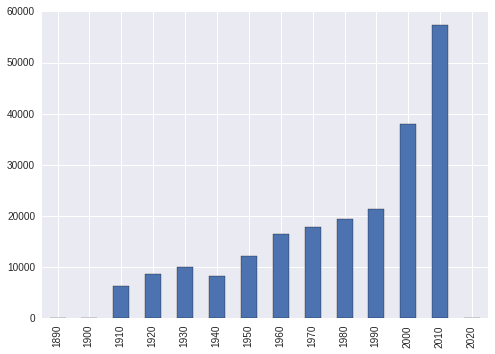

In [7]:
titles['decade'] = titles.year // 10 * 10
titles.decade.value_counts().sort_index().plot(kind="bar")

### Plot the number of "Hamlet" films made each decade.

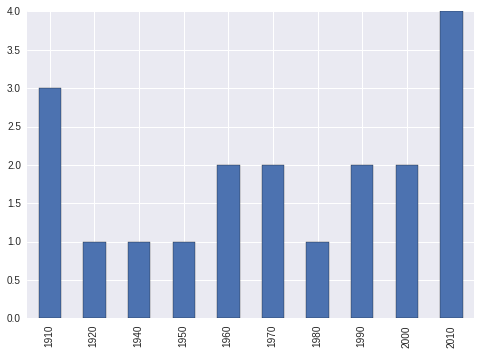

In [8]:
titles[titles.title=="Hamlet"].decade.value_counts().sort_index().plot(kind="bar")

### Plot the number of "Rustler" characters in each decade of the history of film.

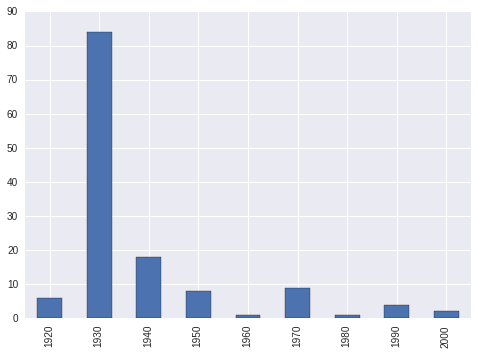

In [9]:
cast['decade'] = cast.year // 10 * 10
cast[cast.character=="Rustler"].decade.value_counts().sort_index().plot(kind="bar")

### Plot the number of "Hamlet" characters each decade.

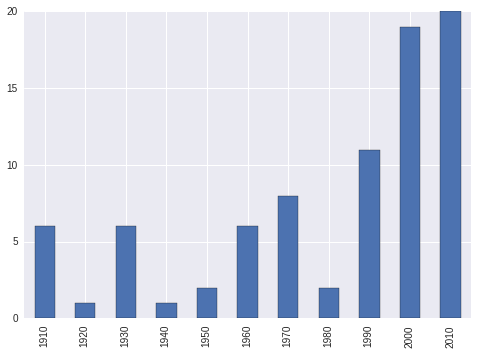

In [15]:
cast[cast.character=="Hamlet"].decade.value_counts().sort_index().plot(kind="bar")

### What are the 11 most common character names in movie history?

In [16]:
cast.character.value_counts().head(11)

Himself        18916
Dancer         11076
Extra           9158
Reporter        7655
Doctor          6850
Policeman       6506
Student         6377
Bartender       6183
Nurse           6171
Party Guest     5923
Minor Role      5920
dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [17]:
cast[cast.character == "Herself"].name.value_counts().head(10)

Joyce Brothers        14
Queen Elizabeth II    11
Margaret Thatcher      8
Joan Rivers            7
Mary Jo Pehl           7
Lili?n Garc?a          6
Chris Evert            5
Kareena Kapoor         5
Marilyn Monroe         5
Rekha                  5
dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [18]:
cast[cast.character == "Himself"].name.value_counts().head(10)

Adolf Hitler             93
Richard Nixon            39
Ronald Reagan            31
John F. Kennedy          26
Ron Jeremy               24
Winston Churchill        20
Bill Clinton             20
George W. Bush           20
Franklin D. Roosevelt    20
Martin Luther King       19
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [21]:
cast[cast.year==1945].name.value_counts().head()

Emmett Vogan       39
Sam (II) Harris    30
Bess Flowers       28
Harold Miller      28
Nolan Leary        27
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [22]:
cast[cast.year==1985].name.value_counts().head()

Shakti Kapoor    19
Mammootty        19
Sukumari         17
Lou Scheimer     15
Aruna Irani      14
dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

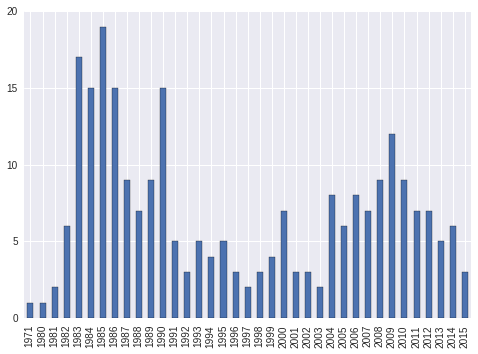

In [25]:
c = cast[cast.name == "Mammootty"].year.value_counts().sort_index().plot(kind="bar")

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [24]:
cast[cast.character.str.startswith('Patron in')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in Restaurant             3
Patron in restaurant             3
Patron in Club                   3
Patron in cabaret                3
Patron in Quiet Bar              2
dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [27]:
cast[cast.character.str.startswith('Science')].head(10)

,title,year,name,type,character,n,decade
10700,Teen Wolf Too,1987,Matthew T. Adams,actor,Science Student,NaN,1980
29214,Three O'Clock High,1987,Michael Alex,actor,Science Kid,25,1980
36255,Fantastic Four,2015,Romeraux Allen,actor,Science Student,NaN,2010
79269,Mutant Chronicles,2008,Roger Ashton-Griffiths,actor,Science Monk,13,2000
122944,The Giggles,2013,Kevin Barnstein,actor,Science Performer 3,19,2010
125967,Wilt,1990,Ian Barritt,actor,Science Teacher,22,1990
135171,Thunderstruck,2012,Drew Battles,actor,Science Teacher,NaN,2010
137809,The Gifted,2014,Jelson Bay,actor,Science Teacher,15,2010
165477,Science Team,2014,Niki Berkon,actor,Science Promo Cadet,NaN,2010
168995,Fantastic Four,2015,Eric Berris,actor,Science Fair Patron,NaN,2010


### Plot the n-values of the roles that Judi Dench has played over her career.

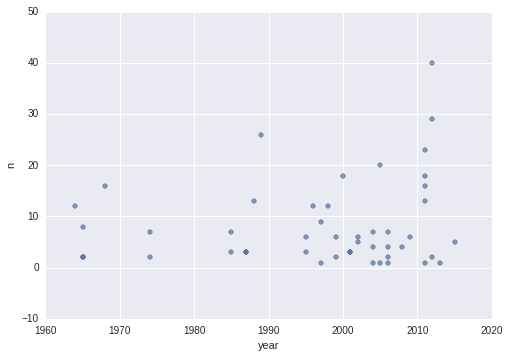

In [27]:
c =cast[cast.name=="Judi Dench"]
c.plot(kind="scatter",x="year",y="n",alpha=.7)

### Plot the n-values of Cary Grant's roles through his career.

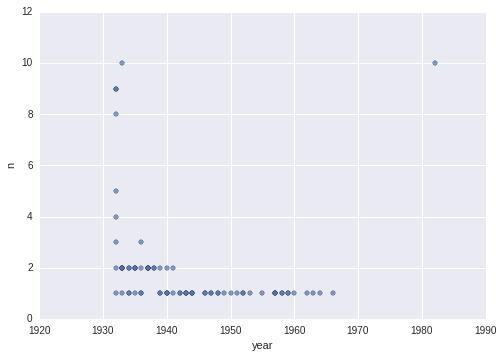

In [26]:
c =cast[cast.name=="Cary Grant"]
c.plot(kind="scatter",x="year",y="n",alpha=.7)

In [48]:
d = c.groupby(['year','n']).size()
d.unstack('n').fillna(' ')
#d.fillna(' ')

n,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,12.0,13.0,16.0,18.0,20.0,23.0,26.0,29.0,40.0
year,,,,,,,,,,,,,,,,,,
1964,,,,,,,,,,1,,,,,,,,
1965,,2,,,,,,1,,,,,,,,,,
1968,,,,,,,,,,,,1,,,,,,
1974,,1,,,,,1,,,,,,,,,,,
1985,,,1,,,,1,,,,,,,,,,,
1987,,,2,,,,,,,,,,,,,,,
1988,,,,,,,,,,,1,,,,,,,
1989,,,,,,,,,,,,,,,,1,,
1995,,,1,,,1,,,,,,,,,,,,


### Plot the n-value of the roles that Sidney Poitier has acted over the years.

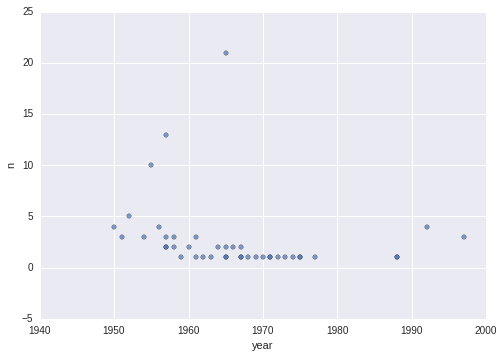

In [28]:
c =cast[cast.name=="Sidney Poitier"]
c.plot(kind="scatter",x="year",y="n",alpha=.7)

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [29]:
cast[(cast.n==1) & (cast.year//10 == 195)].type.value_counts()

actor      6389
actress    2813
dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [30]:
cast[(cast.n==2) & (cast.year//10 == 195)].type.value_counts()

actress    4405
actor      4382
dtype: int64